<h1>Investigate securities properties</h1>

<h3>Pandas profiler</h3>

In [1]:
# the installation take few minutes - 
# it is recommended running it on a clean notebook with only pandas imported and the dataset read.
# when using matplotlib inline there could be some problems and errors

# pip install -U pandas-profiling[notebook]
# jupyter nbextension enable --py widgetsnbextension

<h3>Imports</h3>

In [1]:
import pandas_profiling
from pandas_profiling import ProfileReport

<h3>Installations</h3>

In [ ]:
# !pip install yfinance

<h3>More Imports</h3>

In [48]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# inline plot 
%matplotlib inline  

In [37]:
import warnings
warnings.filterwarnings('ignore')

<h3>Read files</h3>

In [5]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [6]:
data_folder = "../DataRaw/"
data_out = "../DataWork/"

# dat_fname = data_out + "yahoo_download_2022_02_19.csv"
dat_fname = data_out + "yahoo_download_" + pd.to_datetime('today').strftime('%Y_%m_%d') + ".csv"

In [7]:
assets = pd.read_csv(data_folder + "M6_Universe.csv", index_col=0)
symbols = assets.symbol.to_list()

In [8]:
assets.shape

(100, 5)

In [40]:
dat = pd.read_csv(dat_fname,header=[0,1],index_col=0)

In [41]:
dat.head()

Adj Close                                                       \
                ABBV        ACN        AEP        AIZ ALLE       AMAT AMP   
Date                                                                        
2004-12-31       NaN  19.976101  17.274651  22.504539  NaN  12.843545 NaN   
2005-01-03       NaN  19.509995  17.113678  22.615042  NaN  12.633243 NaN   
2005-01-04       NaN  19.051277  17.048286  22.173058  NaN  12.392899 NaN   
2005-01-05       NaN  18.977291  16.847063  21.988890  NaN  12.182590 NaN   
2005-01-06       NaN  18.807127  16.852098  22.541378  NaN  12.092465 NaN   

                                                                             \
                 AMZN        AVB        AVY        AXP        BDX      BF-B   
Date                                                                          
2004-12-31  44.290001  40.959301  38.475574  37.977428  42.906300  7.409595   
2005-01-03  44.520000  40.469749  37.962315  37.667522  42.309544  7.313704   
2005-01-04  42.139999  40.018276  37.436230  37.101578  41.818542  7.269560   
2005-01-05  41.770000  38.087257  36.974289  36.757236  41.584351  7.292396   
2005-01-06  41.049999  38.701920  37.416981  36.568199  41.591919  7.301526   

                                                                          \
                  BMY  BR CARR CDW  CE CHTR     CNC       CNP        COP   
Date                                                                       
2004-12-31  13.436499 NaN  NaN NaN NaN  NaN  7.0875  5.479974  19.128216   
2005-01-03  13.336854 NaN  NaN NaN NaN  NaN  7.1675  5.363587  18.529020   
2005-01-04  13.190003 NaN  NaN NaN NaN  NaN  7.0750  5.310240  18.407858   
2005-01-05  13.147580 NaN  NaN NaN NaN  NaN  6.9600  5.213251  18.544441   
2005-01-06  13.126357 NaN  NaN NaN NaN  NaN  7.0000  5.218100  18.813196   

                                                                         \
                 CTAS CZR  DG       DPZ        DRE        DXC       EWA   
Date                                                                      
2004-12-31  34.254074 NaN NaN  8.428113  14.990513  17.250200  7.747334   
2005-01-03  33.707378 NaN NaN  8.300272  14.753406  17.008444  7.640635   
2005-01-04  33.230984 NaN NaN  8.333419  14.568985  16.696306  7.506101   
2005-01-05  33.145077 NaN NaN  8.248191  14.050855  16.622864  7.533936   
2005-01-06  33.465275 NaN NaN  8.167698  14.050855  16.503517  7.547854   

                                                                             \
                  EWC        EWG       EWH        EWJ        EWL        EWQ   
Date                                                                          
2004-12-31  12.532461  12.727623  7.364271  34.288506  12.476621  15.334927   
2005-01-03  12.409243  12.672971  7.309450  33.880314  12.469369  15.373459   
2005-01-04  12.046822  12.420197  7.132803  33.315113  12.077658  15.026690   
2005-01-05  11.887357  12.427029  6.974431  33.283726  12.077658  15.045951   
2005-01-06  11.822119  12.433859  7.041435  33.283726  12.092168  15.007422   

                                                                            \
                  EWT        EWU        EWY        EWZ  FB FTV        GOOG   
Date                                                                         
2004-12-31  15.246613  18.968447  23.298702  13.029682 NaN NaN   96.035034   
2005-01-03  15.006406  18.853096  22.980087  12.689881 NaN NaN  100.976517   
2005-01-04  14.665067  18.507078  22.350822  12.145025 NaN NaN   96.886841   
2005-01-05  14.601854  18.517561  22.502167  12.039568 NaN NaN   96.393692   
2005-01-06  14.589210  18.507078  22.127790  11.934113 NaN NaN   93.922951   

                                                                            \
                  GPC GSG        HIG HIGH.L        HST HYG IAU ICLN IEAA.L   
Date                                                                         
2004-12-31  25.720831 NaN  47.608997    NaN  10.282948 NaN 

In [42]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 2004-12-31 to 2022-02-18
Columns: 800 entries, ('Adj Close', 'ABBV') to ('Volume', 'XOM')
dtypes: float64(800)
memory usage: 26.8+ MB


<h3>All assets</h3>

In [43]:
dat.columns.levels[0]

Index(['Adj Close', 'Close', 'Dividends', 'High', 'Low', 'Open',
       'Stock Splits', 'Volume'],
      dtype='object')

In [44]:
splits = dat['Stock Splits'].apply(lambda x: sum(x > 0))
assets['splits'] = splits.values

In [45]:
first_day = dat['Adj Close'].apply(lambda x: x.dropna().index[0])
assets['first_trade'] = first_day.values

In [46]:
assets

,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype,splits,first_trade
id,,,,,,,
1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals,0,2013-01-02
2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services,0,2004-12-31
3,Stock,AEP,American Electric Power,Utilities,Electric Utilities,0,2004-12-31
4,Stock,AIZ,Assurant,Financials,Multi-line Insurance,0,2004-12-31
5,Stock,ALLE,Allegion,Industrials,Building Products,0,2013-11-18
6,Stock,AMAT,Applied Materials,Information Technology,Semiconductor Equipment,0,2004-12-31
7,Stock,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,0,2005-09-15
8,Stock,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0,2004-12-31
9,Stock,AVB,AvalonBay Communities,Real Estate,Residential REITs,0,2004-12-31


<h3>Plot for each symbol</h3>

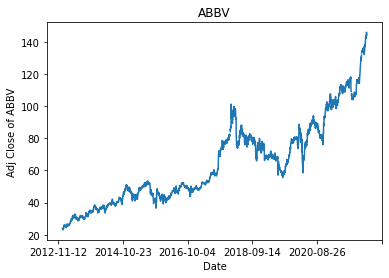

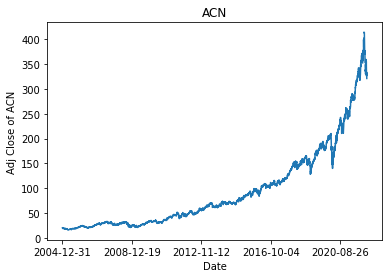

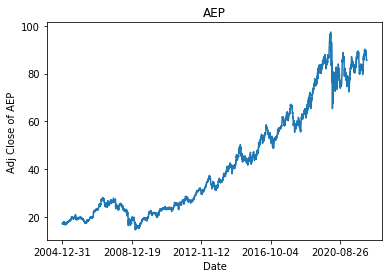

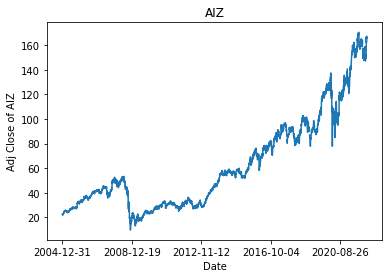

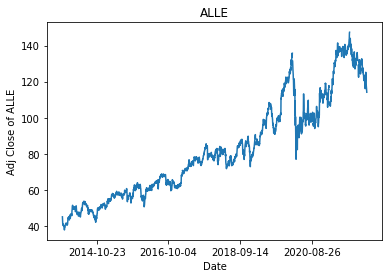

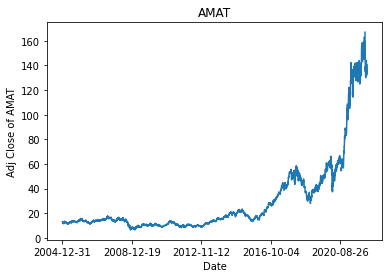

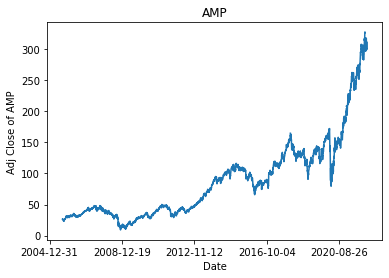

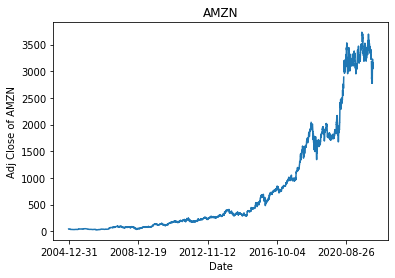

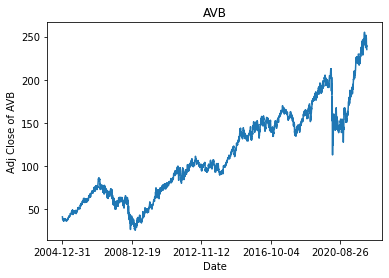

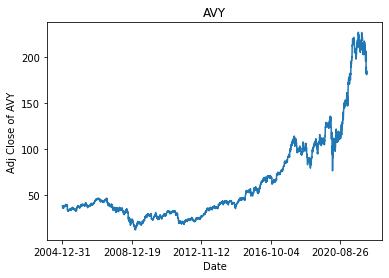

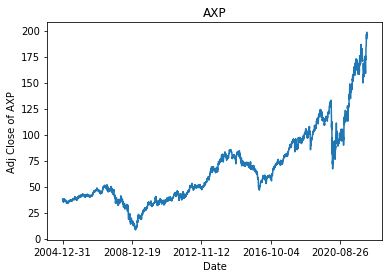

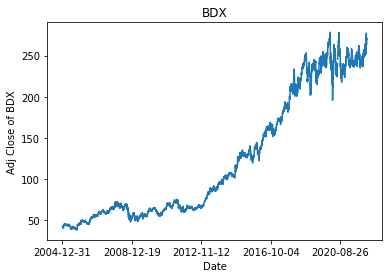

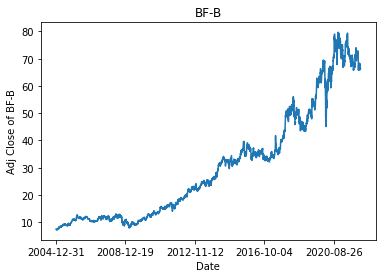

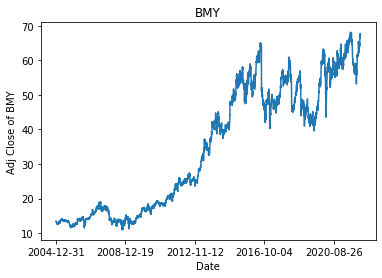

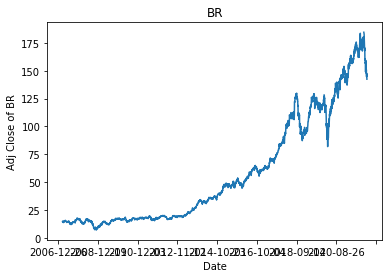

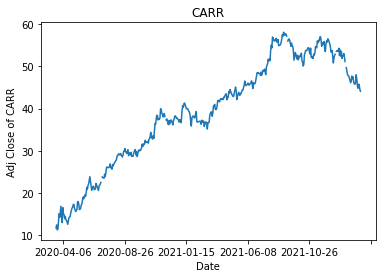

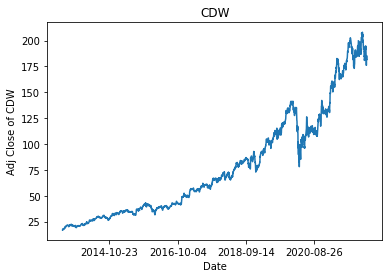

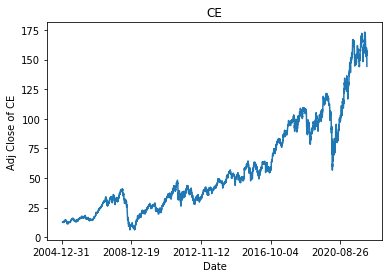

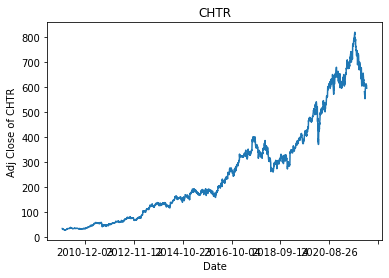

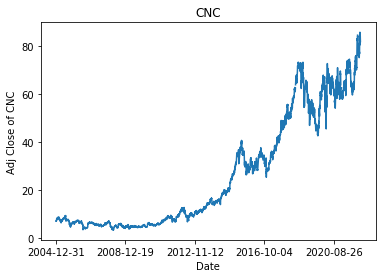

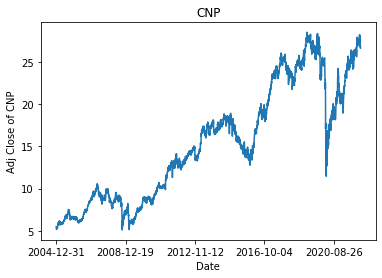

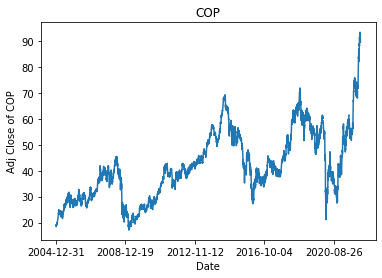

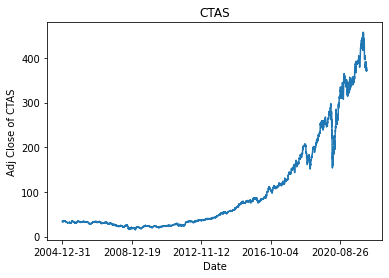

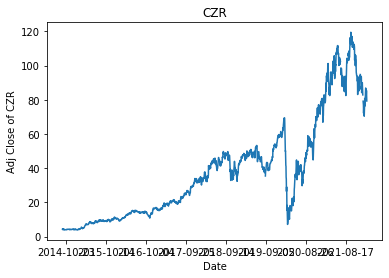

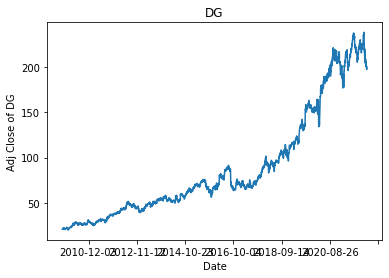

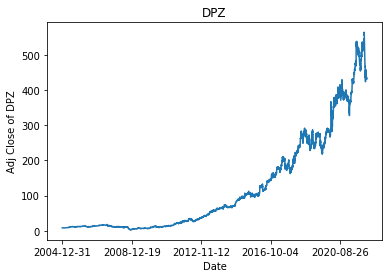

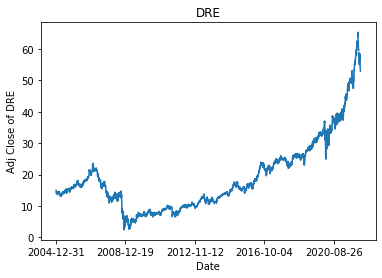

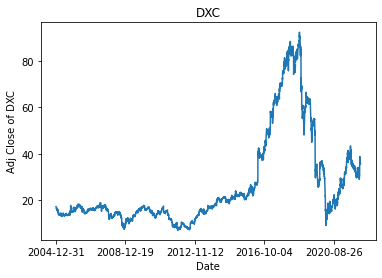

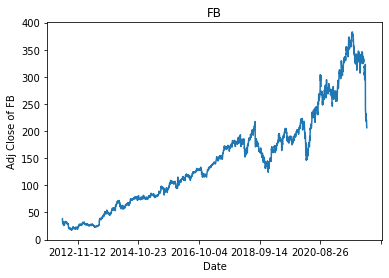

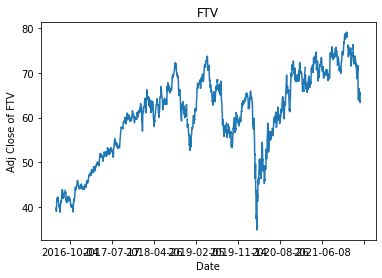

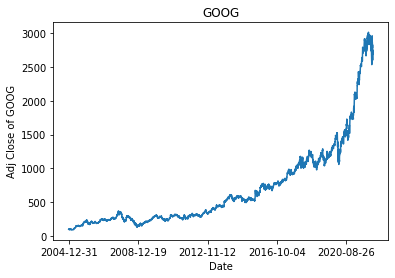

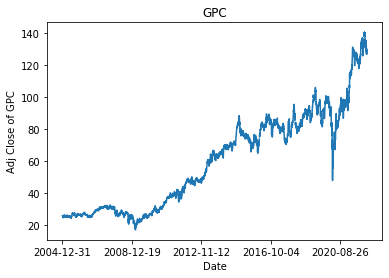

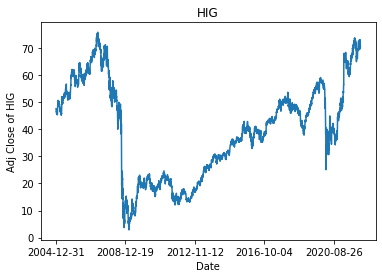

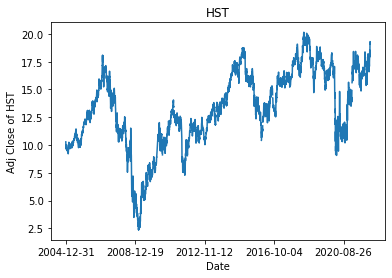

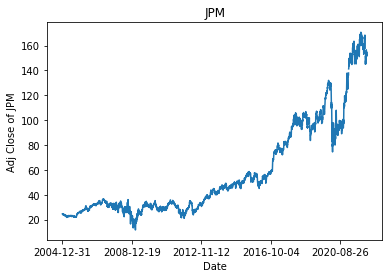

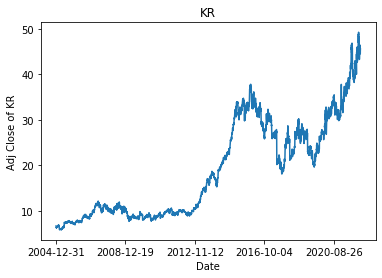

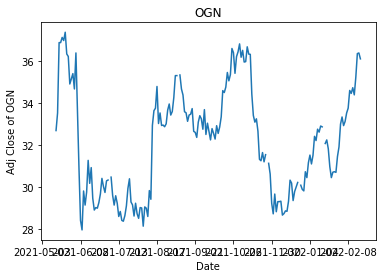

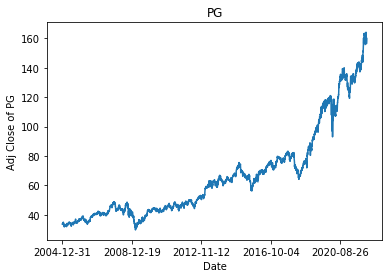

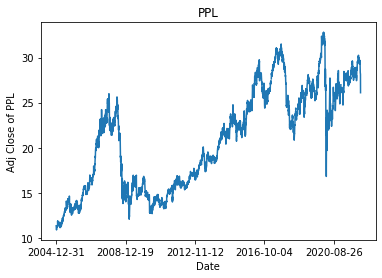

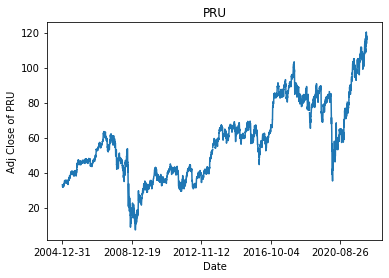

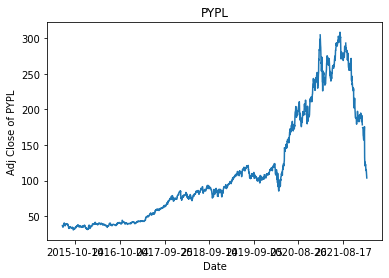

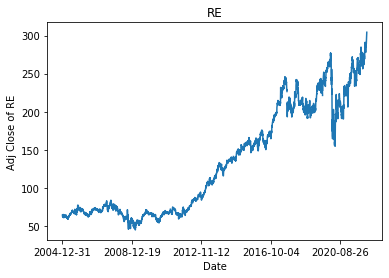

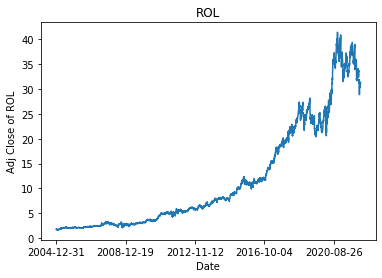

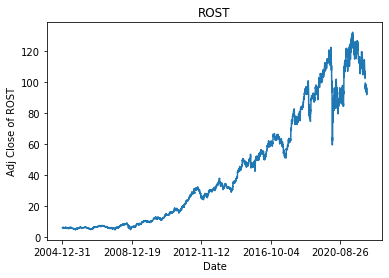

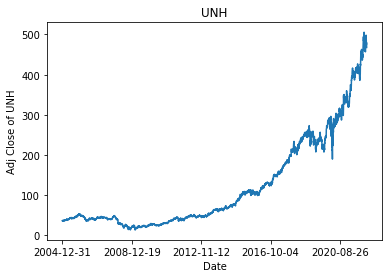

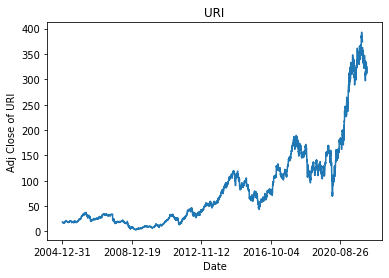

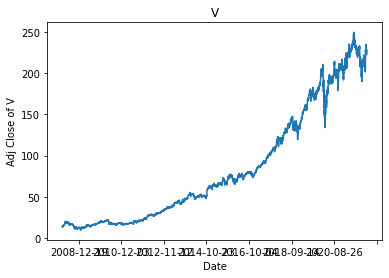

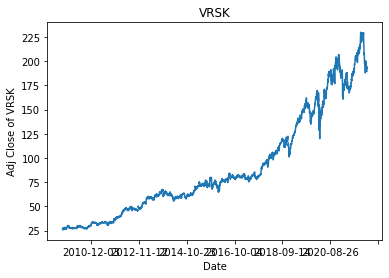

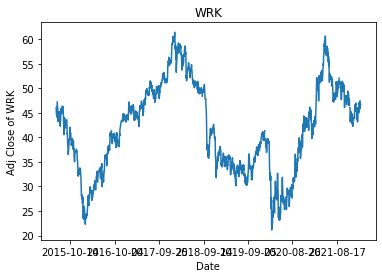

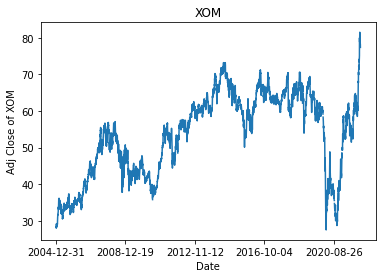

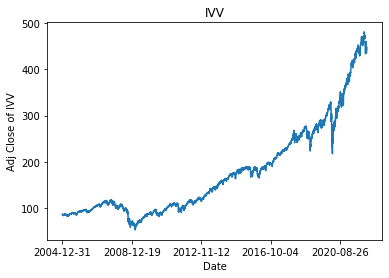

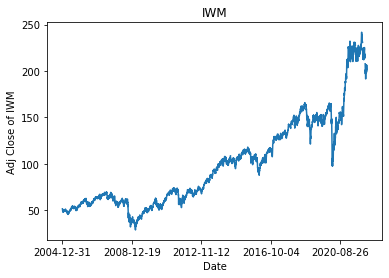

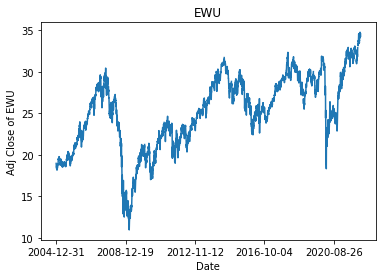

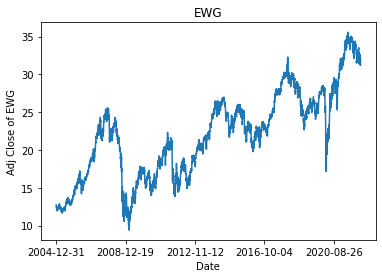

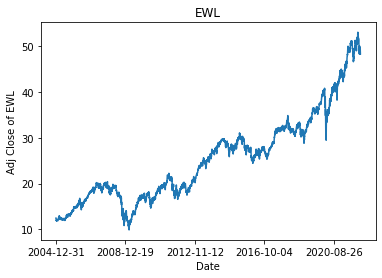

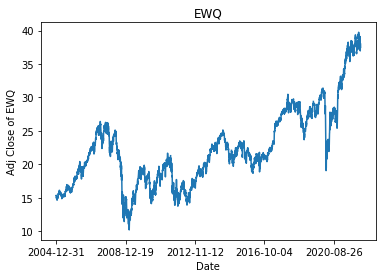

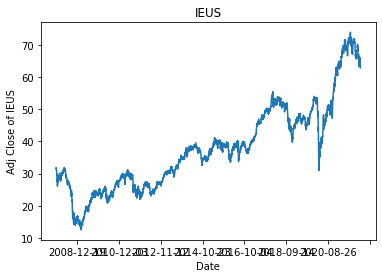

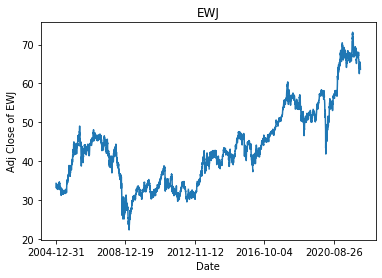

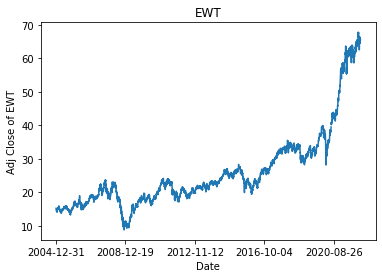

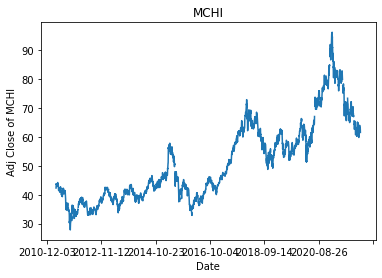

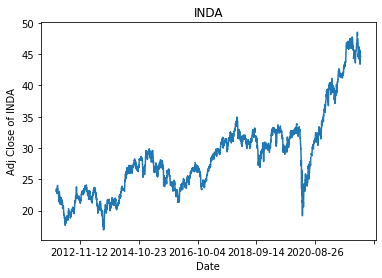

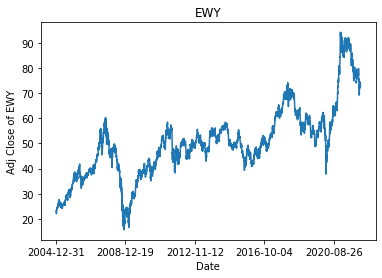

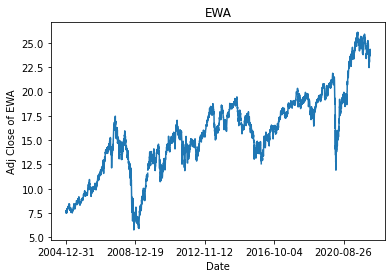

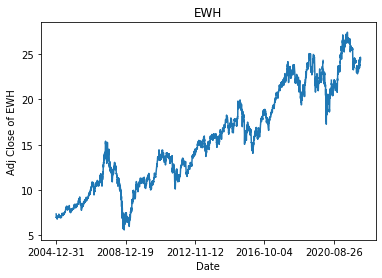

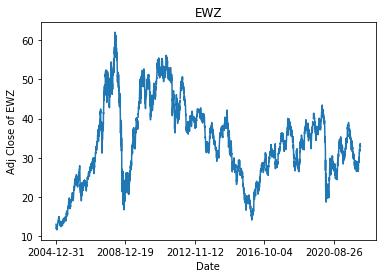

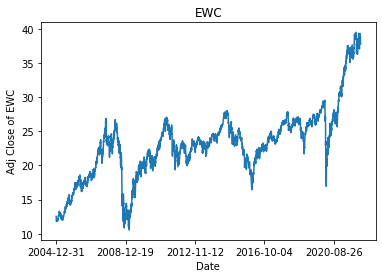

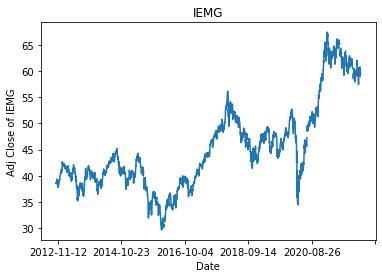

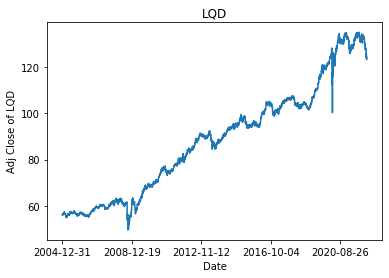

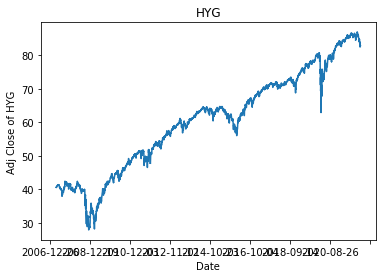

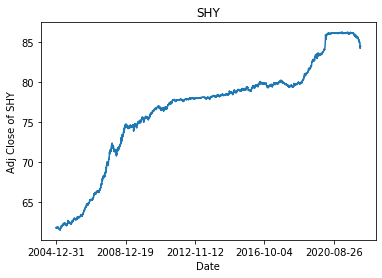

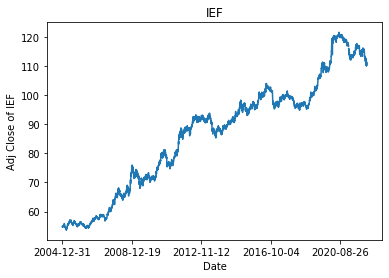

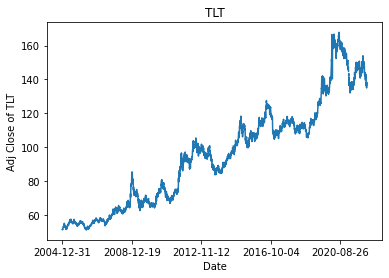

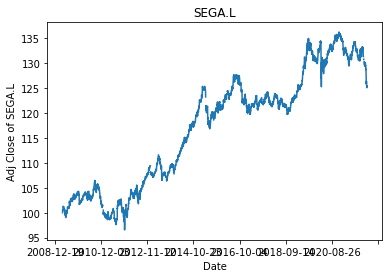

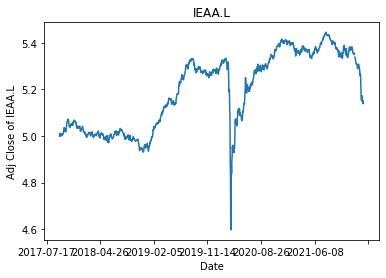

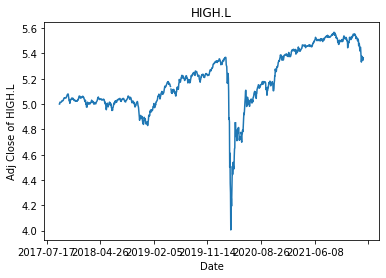

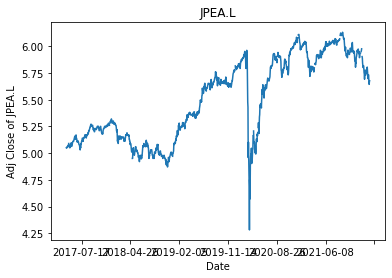

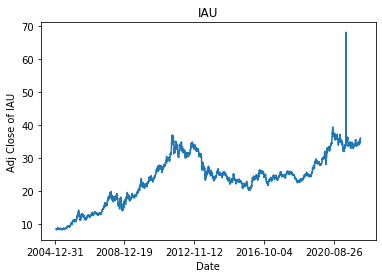

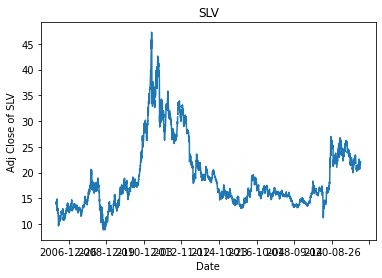

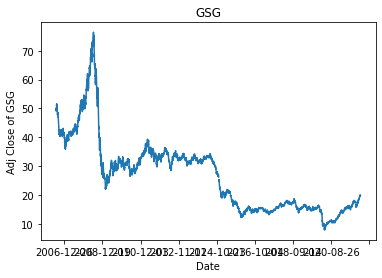

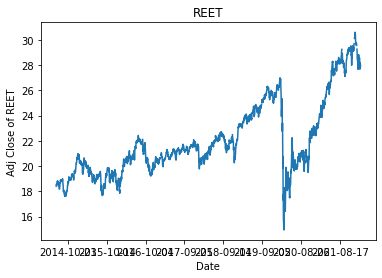

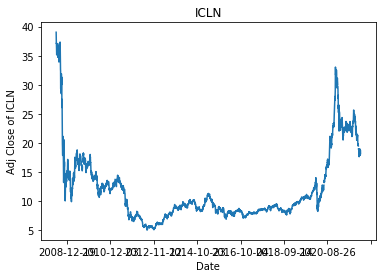

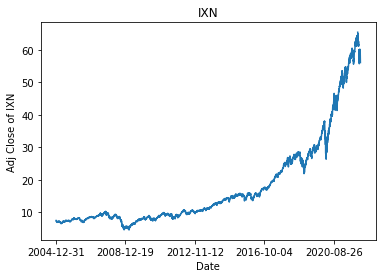

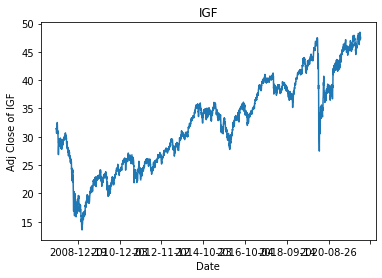

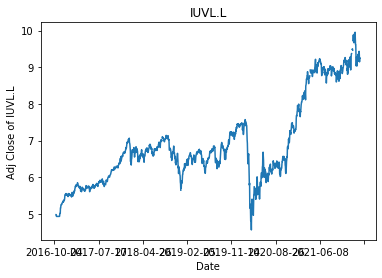

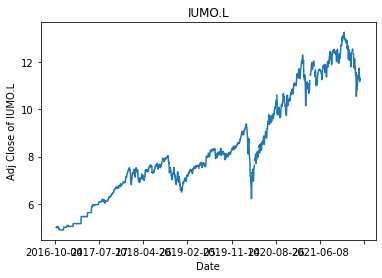

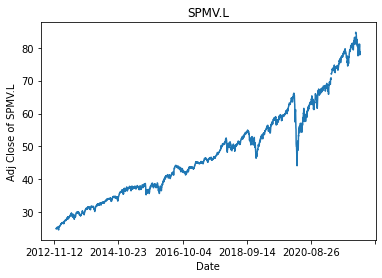

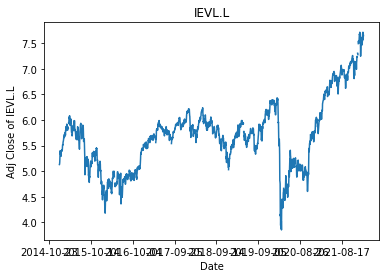

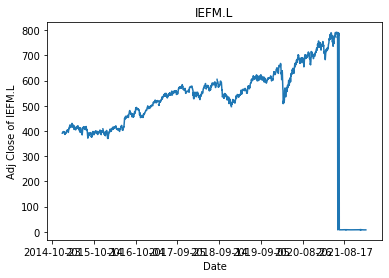

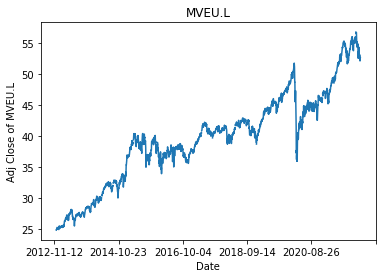

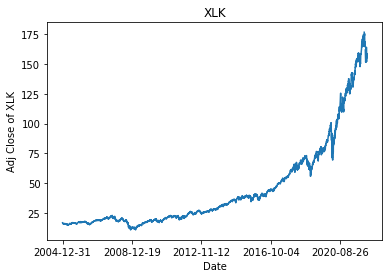

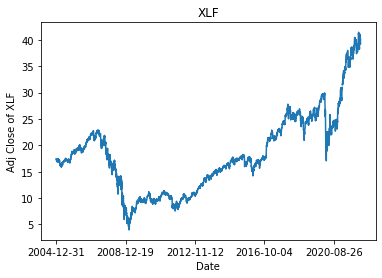

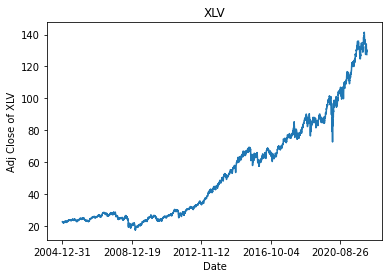

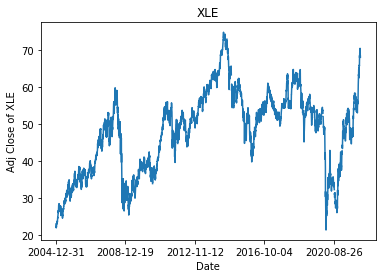

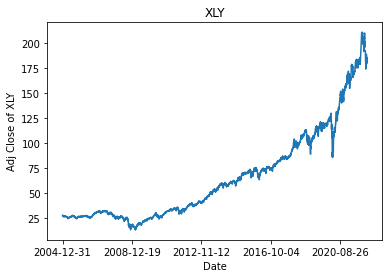

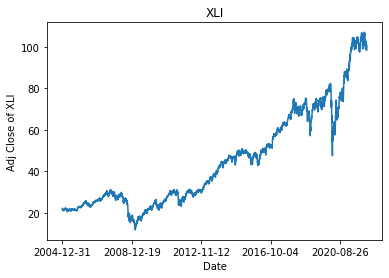

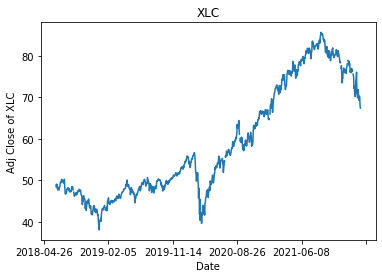

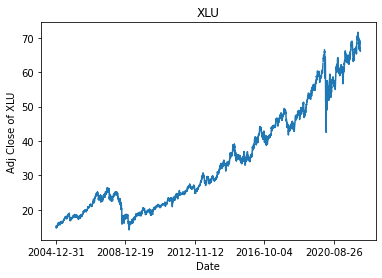

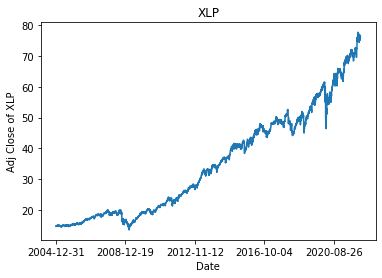

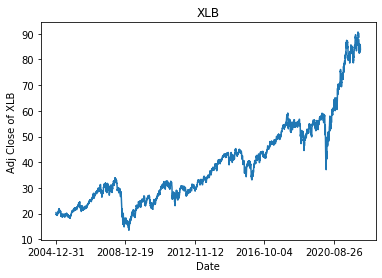

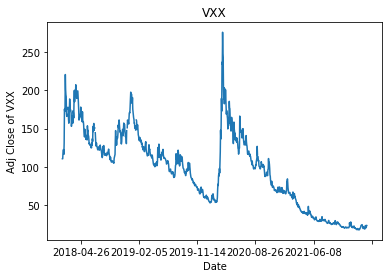

In [51]:
#strange IEFM.L spikes
for i in symbols:
    dat['Adj Close'][i].plot()
    plt.ylabel('Adj Close of ' + i)
    plt.title(i)
    plt.show()

<h3>Flat index for header</h3>

In [35]:
data = dat
data.columns = ["_".join(reversed(a)) for a in dat.columns.to_flat_index()]
dat.head()

,ABBV_Adj Close,ACN_Adj Close,AEP_Adj Close,AIZ_Adj Close,ALLE_Adj Close,AMAT_Adj Close,AMP_Adj Close,AMZN_Adj Close,AVB_Adj Close,AVY_Adj Close,AXP_Adj Close,BDX_Adj Close,BF-B_Adj Close,BMY_Adj Close,BR_Adj Close,CARR_Adj Close,CDW_Adj Close,CE_Adj Close,CHTR_Adj Close,CNC_Adj Close,CNP_Adj Close,COP_Adj Close,CTAS_Adj Close,CZR_Adj Close,DG_Adj Close,DPZ_Adj Close,DRE_Adj Close,DXC_Adj Close,EWA_Adj Close,EWC_Adj Close,EWG_Adj Close,EWH_Adj Close,EWJ_Adj Close,EWL_Adj Close,EWQ_Adj Close,EWT_Adj Close,EWU_Adj Close,EWY_Adj Close,EWZ_Adj Close,FB_Adj Close,FTV_Adj Close,GOOG_Adj Close,GPC_Adj Close,GSG_Adj Close,HIG_Adj Close,HIGH.L_Adj Close,HST_Adj Close,HYG_Adj Close,IAU_Adj Close,ICLN_Adj Close,IEAA.L_Adj Close,IEF_Adj Close,IEFM.L_Adj Close,IEMG_Adj Close,IEUS_Adj Close,IEVL.L_Adj Close,IGF_Adj Close,INDA_Adj Close,IUMO.L_Adj Close,IUVL.L_Adj Close,IVV_Adj Close,IWM_Adj Close,IXN_Adj Close,JPEA.L_Adj Close,JPM_Adj Close,KR_Adj Close,LQD_Adj Close,MCHI_Adj Close,MVEU.L_Adj Close,OGN_Adj Close,PG_Adj Close,PPL_Adj Close,PRU_Adj Close,PYPL_Adj Close,RE_Adj Close,REET_Adj Close,ROL_Adj Close,ROST_Adj Close,SEGA.L_Adj Close,SHY_Adj Close,SLV_Adj Close,SPMV.L_Adj Close,TLT_Adj Close,UNH_Adj Close,URI_Adj Close,V_Adj Close,VRSK_Adj Close,VXX_Adj Close,WRK_Adj Close,XLB_Adj Close,XLC_Adj Close,XLE_Adj Close,XLF_Adj Close,XLI_Adj Close,XLK_Adj Close,XLP_Adj Close,XLU_Adj Close,XLV_Adj Close,XLY_Adj Close,XOM_Adj Close,ABBV_Close,ACN_Close,AEP_Close,AIZ_Close,ALLE_Close,AMAT_Close,AMP_Close,AMZN_Close,AVB_Close,AVY_Close,AXP_Close,BDX_Close,BF-B_Close,BMY_Close,BR_Close,CARR_Close,CDW_Close,CE_Close,CHTR_Close,CNC_Close,CNP_Close,COP_Close,CTAS_Close,CZR_Close,DG_Close,DPZ_Close,DRE_Close,DXC_Close,EWA_Close,EWC_Close,EWG_Close,EWH_Close,EWJ_Close,EWL_Close,EWQ_Close,EWT_Close,EWU_Close,EWY_Close,EWZ_Close,FB_Close,FTV_Close,GOOG_Close,GPC_Close,GSG_Close,HIG_Close,HIGH.L_Close,HST_Close,HYG_Close,IAU_Close,ICLN_Close,IEAA.L_Close,IEF_Close,IEFM.L_Close,IEMG_Close,IEUS_Close,IEVL.L_Close,IGF_Close,INDA_Close,IUMO.L_Close,IUVL.L_Close,IVV_Close,IWM_Close,IXN_Close,JPEA.L_Close,JPM_Close,KR_Close,LQD_Close,MCHI_Close,MVEU.L_Close,OGN_Close,PG_Close,PPL_Close,PRU_Close,PYPL_Close,RE_Close,REET_Close,ROL_Close,ROST_Close,SEGA.L_Close,SHY_Close,SLV_Close,SPMV.L_Close,TLT_Close,UNH_Close,URI_Close,V_Close,VRSK_Close,VXX_Close,WRK_Close,XLB_Close,XLC_Close,XLE_Close,XLF_Close,XLI_Close,XLK_Close,XLP_Close,XLU_Close,XLV_Close,XLY_Close,XOM_Close,ABBV_Dividends,ACN_Dividends,AEP_Dividends,AIZ_Dividends,ALLE_Dividends,AMAT_Dividends,AMP_Dividends,AMZN_Dividends,AVB_Dividends,AVY_Dividends,AXP_Dividends,BDX_Dividends,BF-B_Dividends,BMY_Dividends,BR_Dividends,CARR_Dividends,CDW_Dividends,CE_Dividends,CHTR_Dividends,CNC_Dividends,CNP_Dividends,COP_Dividends,CTAS_Dividends,CZR_Dividends,DG_Dividends,DPZ_Dividends,DRE_Dividends,DXC_Dividends,EWA_Dividends,EWC_Dividends,EWG_Dividends,EWH_Dividends,EWJ_Dividends,EWL_Dividends,EWQ_Dividends,EWT_Dividends,EWU_Dividends,EWY_Dividends,EWZ_Dividends,FB_Dividends,FTV_Dividends,GOOG_Dividends,GPC_Dividends,GSG_Dividends,HIG_Dividends,HIGH.L_Dividends,HST_Dividends,HYG_Dividends,IAU_Dividends,ICLN_Dividends,...,IEAA.L_Open,IEF_Open,IEFM.L_Open,IEMG_Open,IEUS_Open,IEVL.L_Open,IGF_Open,INDA_Open,IUMO.L_Open,IUVL.L_Open,IVV_Open,IWM_Open,IXN_Open,JPEA.L_Open,JPM_Open,KR_Open,LQD_Open,MCHI_Open,MVEU.L_Open,OGN_Open,PG_Open,PPL_Open,PRU_Open,PYPL_Open,RE_Open,REET_Open,ROL_Open,ROST_Open,SEGA.L_Open,SHY_Open,SLV_Open,SPMV.L_Open,TLT_Open,UNH_Open,URI_Open,V_Open,VRSK_Open,VXX_Open,WRK_Open,XLB_Open,XLC_Open,XLE_Open,XLF_Open,XLI_Open,XLK_Open,XLP_Open,XLU_Open,XLV_Open,XLY_Open,XOM_Open,ABBV_Stock Splits,ACN_Stock Splits,AEP_Stock Splits,AIZ_Stock Splits,ALLE_Stock Splits,AMAT_Stock Splits,AMP_Stock Splits,AMZN_Stock Splits,AVB_Stock Splits,AVY_Stock Splits,AXP_Stock Splits,BDX_Stock Splits,BF-B_Stock Splits,BMY_Stock Splits,BR_Stock Splits,CARR_Stock Splits,CDW_Stock Splits,CE_Stock Splits,CHTR_Stock Splits,

In [36]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=data, title="Data Report", explorative=True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]